# Trabajo práctico 4

## Francisco Apezteguía, Valentín Mannarino, Juan Sebastián Navajas Jáuregui


# Parte I Análisis de la base de hogares y cálculo de pobreza

### Ejercicio 1 

Importamos la base de la Encuesta Permanente de Hogares (EPH) del INDEC para al primer trimestre de 2023 y conservamos las observaciones que corresponden a Gran Buenos Aires.

In [1]:
# Importamos los paquetes que utilizaremos y seteamos el directorio con el que vamos a trabajar
import pandas as pd
import matplotlib.pyplot as plt
import os
os.chdir(r"C:\Users\Usuario\OneDrive - Económicas - UBA\Valentin\Maestria\Optativas\Tercer trimestre\BIg Data\Trabajo Práctico\Tp4")

# Importamos la base de datos a nivel hogar
data_eph_h = pd.read_excel("usu_hogar_T123.xlsx ")

In [2]:
# Trabajamos con las observaciones que son de la región Gran Buenos Aires
data_eph_h=data_eph_h[data_eph_h["REGION"]==1]

### Ejercicio 2
Importamos la base de datos individual para unirla con la de hogares.

In [3]:
# Importamos la base de datos a nivel individual
data_eph_i = pd.read_excel("usu_individual_T123.xlsx ")

# Trabajamos con las observaciones que son de la región Gran Buenos Aires
data_eph_i=data_eph_i[data_eph_i["REGION"]==1]

Realizamos la unión entre la base individual y la base de hogar

In [4]:
# En la base Hogar (archivo usu_hogar.txt) todos los hogares que pertenecen a una 
# misma vivienda poseen el mismo CODUSU. Para identificar los hogares se debe utilizar 
# CODUSU y NRO_HOGAR.

# En la de base de individuos (archivo usu_individual.txt) todos los miembros del hogar tienen el 
# mismo CODUSU y NRO_HOGAR.

# De esta forma, entendemos que debemos hacer el unión en base a CODUSU y NRO_HOGAR.

# Realiza el merge, para aquellas variables repetidas se agregará un sufijo y mantendrá ambas variables
#data_eph = data_eph_h.merge(data_eph_i, on='CODUSU', how='inner')
data_eph = data_eph_h.merge(data_eph_i, on=['CODUSU', 'NRO_HOGAR'], how='inner')

In [5]:
# Eliminamos todas las columnas que terminen con _y que son un duplicado
data_eph = data_eph.filter(regex='^(?!.*_y$)')

In [6]:
# Renombra las columnas que terminan con "_x" eliminando la extensión
data_eph = data_eph.rename(columns=lambda x: x.rstrip('_x'))

### Ejercicio 3

Limpiamos la base en base a las funciones que creamos y ciertas variables particulares que necesiten una limpieza manual

In [7]:
def eliminar_valores(base, variables):
    '''
    La función elimina aquellas observaciones que tengan un valor menor a cero en las variables especificadas.
    Input:
        base: DataFrame con los datos.
        variables: Lista de nombres de las variables a filtrar.
    Output:
        DataFrame con las observaciones filtradas.
    '''
    # Creamos una copia del DataFrame original para hacer la limpieza
    df_filtrado = base.copy()

    # Iteramos a través de las variables y filtramoslas observaciones
    for variable in variables:
        df_filtrado = df_filtrado[df_filtrado[variable] >= 0]

    return df_filtrado

In [8]:
def outliers_ingresos(base, variables):
    '''
    La función elimina aquellas observaciones que tengan valores de ingresos superiores en 50 veces la media de la población.
    Input:
        base: DataFrame con los datos.
        variables: Lista de nombres de las variables a filtrar.
    Output:
        DataFrame con las observaciones filtradas.
    '''
    df_filtrado = base.copy()
    for variable in variables:
        media = df_filtrado[variable].mean()  
        limite_superior = media * 5  # Establecemos el límite superior
        df_filtrado = df_filtrado[df_filtrado[variable] <= limite_superior]

    return df_filtrado

In [9]:
def eliminar_missings(base, umbral):
    '''
    La función elimina las columnas que tienen más valores faltantes respecto al "umbral".
    Input:
        base: DataFrame con los datos.
        umbral: Umbral de valores faltantes permitidos.
    Output:
        DataFrame con las columnas eliminadas.
    '''
    df_filtrado = base.copy()
    # Pedimos que elimine las columnas que superen el umbral
    columnas_a_eliminar = [columna for columna in base.columns if base[columna].isna().sum() > umbral]
    df_filtrado = df_filtrado.drop(columnas_a_eliminar, axis=1)
   
    return df_filtrado

In [10]:
def eliminar_valores_9(base, variables):
    '''
    La función elimina aquellas observaciones que tengan un valor mayor o igual a nueve en las variables especificadas.
    Input:
        base: DataFrame con los datos.
        variables: Lista de nombres de las variables a filtrar.
    Output:
        DataFrame con las observaciones filtradas.
    '''
    df_filtrado = base.copy()
    for variable in variables:
        df_filtrado = df_filtrado[df_filtrado[variable] <= 9]

    return df_filtrado

Utilizamos la función eliminar_valores para aquellas observaciones que tengan valores menores a 0, en especial las de ingresos. 

In [11]:
variables_filtro = ['ITF','IPCF', 'P21', 'P47T', 'CH06']
data_eph = eliminar_valores (data_eph, variables_filtro)

Realizamos un gráfico boxplots para visualizar que las variable de ingresos tienen outliers

C:\Users\Usuario\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Usuario\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Usuario\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Usuario\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.type

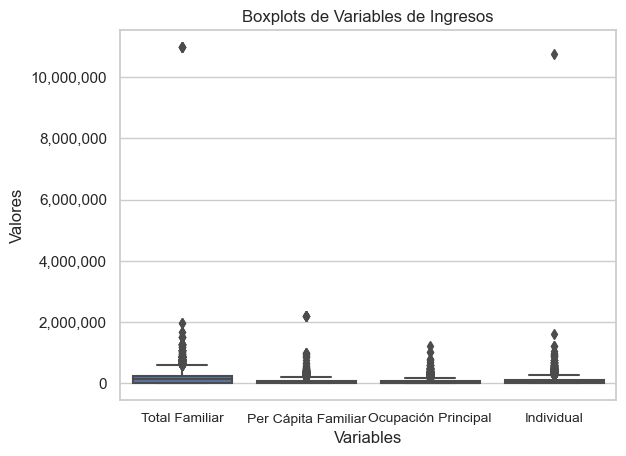

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

# Creamos el vector con variables de ingreso que vamos a utilizar
variables_filtro = ['ITF', 'IPCF', 'P21', 'P47T']

# Configuramos el estilo de seaborn para hacer el gráfico más atractivo
sns.set(style="whitegrid")

# Creamos el boxplot
ax = sns.boxplot(data=data_eph[variables_filtro])

# Desactivamos la notación científica en el eje y y agregamos un punto como separador de miles
ax.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))

# Cambiamos el nombre de las variables en el gráfico
nuevos_nombres = {
    'ITF': 'Total Familiar',
    'IPCF': 'Per Cápita Familiar',
    'P21': 'Ocupación Principal',
    'P47T': 'Individual'
}

ax.set_xticklabels([nuevos_nombres.get(var, var) for var in variables_filtro])

# Ajustamos el tamaño de la fuente en el eje x
plt.xticks(fontsize=10)

# Etiquetas y título
plt.xlabel('Variables')
plt.ylabel('Valores')
plt.title('Boxplots de Variables de Ingresos')
plt.show()

Utilizamos la función outliers para quitar de la muestra aquellas observaciones que posean valores superiores a 5 veces la media. 

In [13]:
variables_filtro = ['ITF','IPCF', 'P21', 'P47T']
data_eph = outliers_ingresos (data_eph, variables_filtro)

C:\Users\Usuario\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Usuario\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Usuario\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Usuario\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.type

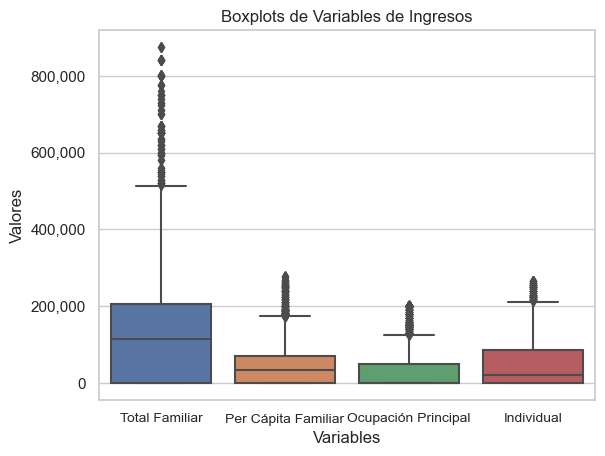

In [14]:
# Realizamos el mismo boxplot con la base filtrada
sns.set(style="whitegrid")
ax = sns.boxplot(data=data_eph[variables_filtro])
ax.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))
nuevos_nombres = {
    'ITF': 'Total Familiar',
    'IPCF': 'Per Cápita Familiar',
    'P21': 'Ocupación Principal',
    'P47T': 'Individual'
}

ax.set_xticklabels([nuevos_nombres.get(var, var) for var in variables_filtro])
plt.xticks(fontsize=10)
plt.xlabel('Variables')
plt.ylabel('Valores')
plt.title('Boxplots de Variables de Ingresos')
plt.show()

Decidimos quedarnos con aquellas variables que tengan hasta un máximo de 350 valores faltantes.
Tomamos esta decisión teniendo en mente el trade off entre la complejidad que puede tener el modelo (cantidad de variables explicativas)
y la problemática que existe al no poder calcular modelos de predicción con valores missing. 
En caso de incluir estas variables, deberíamos sacrificar una gran cantidad de observaciones.

In [15]:
umbral = 350 
data_eph = eliminar_missings(data_eph, umbral)

Utilizamos la función eliminar_valores_9 para aquellas variables que tengan un valor mayor a 9 ya que en general este valor indica que las personas no respondieron a la pregunta de la encuesta
La variable Departamento en propiedad horizontal no la eliminamos porque implicaría quitar cerca del 10% de las observaciones. 

In [16]:
variables_filtro = ['II7','V1','V2','V3','V4','V5','V6','V12','V13','V14','V17','CH07','CH10','NIVEL_ED']
data_eph = eliminar_valores_9 (data_eph, variables_filtro)

Hacemos limpieza de algunas variables que no cumplen con los criterios establecidos por nuestras funciones. 
Por ejemplo, CH08 tiene el 9 como no respuesta pero luego tiene valores mayores que tienen asociados respuestas con utilidad. 

In [17]:
data_eph = data_eph[data_eph['CH08'] != 9]
data_eph = data_eph[data_eph['IV2'] != 99]
data_eph = data_eph[data_eph['II1'] != 99]
data_eph = data_eph[data_eph['II9'] > 0]
data_eph = data_eph[data_eph['IV11'] != 0]
data_eph = data_eph[data_eph['II4_1'] != 0]

Mostramos las variables que quedaron disponibles, luego de la limpieza.

In [18]:
columnas_resultantes = data_eph.columns.tolist()
print(columnas_resultantes)

['CODUSU', 'ANO4', 'TRIMESTRE', 'NRO_HOGAR', 'REALIZADA', 'REGION', 'MAS_500', 'AGLOMERADO', 'PONDERA', 'IV1', 'IV2', 'IV3', 'IV4', 'IV5', 'IV6', 'IV7', 'IV8', 'IV9', 'IV10', 'IV11', 'IV12_1', 'IV12_2', 'IV12_3', 'II1', 'II2', 'II3', 'II3_1', 'II4_1', 'II4_2', 'II4_3', 'II5', 'II5_1', 'II6', 'II6_1', 'II7', 'II8', 'II9', 'V1', 'V2', 'V21', 'V22', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19_A', 'V19_B', 'IX_TOT', 'IX_MEN10', 'IX_MAYEQ10', 'ITF', 'DECIFR', 'RDECIFR', 'GDECIFR', 'ADECIFR', 'IPCF', 'DECCFR', 'RDECCFR', 'GDECCFR', 'ADECCFR', 'PONDIH', 'VII1_1', 'VII1_2', 'VII2_1', 'VII2_2', 'VII2_3', 'VII2_4', 'COMPONENTE', 'H15', 'CH03', 'CH04', 'CH05', 'CH06', 'CH07', 'CH08', 'CH09', 'CH10', 'CH11', 'CH12', 'CH13', 'CH15', 'CH16', 'NIVEL_ED', 'ESTADO', 'CAT_OCUP', 'CAT_INAC', 'PP02C1', 'PP02C2', 'PP02C3', 'PP02C4', 'PP02C5', 'PP02C6', 'PP02C7', 'PP02C8', 'PP02E', 'PP02H', 'PP02I', 'P21', 'DECOCUR', 'RDECOCUR', 'GDECOCUR', '

A continuación, filtramos nuestra base de datos para seleccionar las variables que serán utilizadas en los siguientes ejercicios. 

In [19]:
# Generamos la lista de variables de interés.
variables_de_interes = ['CODUSU', 'PONDIH', 'IV2', 'IV3','IV6', 'IV8',
                        'IV10', 'IV11', 'IV12_1', 'IV12_2', 'IV12_3', 'II1', 'II7', 'II8', 'II9', 'V1', 'V2', 'V3', 'V4',
                        'V5', 'V6', 'V12', 'V13', 'V14', 'V17', 'ITF', 'IX_TOT',
                        'IX_MEN10', 'IPCF', 'P47T', 'CH04', 'CH06', 'CH07', 
                        'CH08', 'CH09','CH10', 'NIVEL_ED', 'ESTADO', 'CAT_INAC']

In [20]:
# Nos quedamos con las variables de interés
data_eph = data_eph[variables_de_interes]

In [21]:
# Obtenemos los tipos de variables en la lista
tipos_variables = data_eph[variables_de_interes].dtypes
print(tipos_variables)

CODUSU       object
PONDIH        int64
IV2           int64
IV3           int64
IV6           int64
IV8           int64
IV10          int64
IV11          int64
IV12_1        int64
IV12_2        int64
IV12_3        int64
II1           int64
II7           int64
II8           int64
II9           int64
V1            int64
V2            int64
V3            int64
V4            int64
V5            int64
V6            int64
V12           int64
V13           int64
V14           int64
V17           int64
ITF           int64
IX_TOT        int64
IX_MEN10      int64
IPCF        float64
P47T        float64
CH04          int64
CH06          int64
CH07          int64
CH08        float64
CH09          int64
CH10          int64
NIVEL_ED      int64
ESTADO        int64
CAT_INAC      int64
dtype: object


A pesar de ser variables enteras (int64) en cuanto a su composición, algunas de las variables con las cuales trabajaremos son en realidad categóricas. Procedemos a transformar entonces a las siguientes variables: IV3, IV6, IV8, IV10, IV11, IV12_1, IV12_2, IV12_3, II7, II7, II9, V1, V2, V3, V4, V5, V6, V12, V13, V14, V17, CH04, CH07, CH09, CH10, NIVEL_ED, ESTADO, CAT_INAC.
Lo mismo ocurre para la variable CH08, que a pesar de ser categórica está en tipo décimal.

In [22]:
columnas_a_convertir = ['IV3', 'IV6', 'IV8', 'IV10', 'IV11', 'IV12_1', 'IV12_2', 'IV12_3',
                         'II7', 'II9', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V12', 'V13', 'V14', 'V17',
                         'CH04', 'CH07', 'CH09', 'CH10', 'NIVEL_ED', 'ESTADO','CH08', 'CAT_INAC']
data_eph[columnas_a_convertir] = data_eph[columnas_a_convertir].astype('category')

In [23]:
# Observamos nuevamente el tipo de variables con las que contamos
tipos_variables = data_eph[variables_de_interes].dtypes
print(tipos_variables)

CODUSU        object
PONDIH         int64
IV2            int64
IV3         category
IV6         category
IV8         category
IV10        category
IV11        category
IV12_1      category
IV12_2      category
IV12_3      category
II1            int64
II7         category
II8            int64
II9         category
V1          category
V2          category
V3          category
V4          category
V5          category
V6          category
V12         category
V13         category
V14         category
V17         category
ITF            int64
IX_TOT         int64
IX_MEN10       int64
IPCF         float64
P47T         float64
CH04        category
CH06           int64
CH07        category
CH08        category
CH09        category
CH10        category
NIVEL_ED    category
ESTADO      category
CAT_INAC    category
dtype: object


In [24]:
# Controlamos no tener columnas con missings
columns_with_nan = data_eph.columns[data_eph.isna().any()].tolist()
print("Columns with NaN values:", columns_with_nan)

Columns with NaN values: []


No observamos missings values.

### Ejercicio 4
Creamos tres variables que suponemos que son relevantes para predecir la pobreza

En esta instancia, crearemos la variable "pobreza_estructural", la cual adquiere el valor 1 si cumple con al menos dos de las características seleccionadas. La razón subyacente a esta elección radica en la intuición de que la presencia de más de dos de estas características puede indicar la existencia de pobreza estructural. Dichas características incluyen: nunca asistieron a un establecimiento educativo;  tener menos de dos ambientes en la casa; los pisos son de cemento, ladrillo fijo, aldrillo suelto o tierra; no tienen agua por cañeria dentro de la vivienda; no tiene baño; el baño no tiene inodro con botón/mochila/cadena y arrastre de agua; el desague del baño es a pozo ciego o letrina; la vivienda se ecuentra en basurales/ zona inundable/ villa de emergencia; combustible utilizado para cocinar no es gas de red. 

In [25]:
# Creamos la variable pobreza_estructural, que comienza tomando valor 0
data_eph['pobreza_estructural'] = 0

# Creamos las condiciones
conditions = [
    (data_eph['CH10']==3),
    (data_eph['IV2'] <= 2),
    (data_eph['IV3'].isin([2, 3])),
    (data_eph['IV6'].isin([2, 3])),
    (data_eph['IV8'] == 2),
    (data_eph['IV10'].isin([2, 3])),
    (data_eph['IV11'].isin([3, 4])),
    (data_eph['IV12_1'] == 1),
    (data_eph['IV12_2'] == 1),
    (data_eph['IV12_3'] == 1),
    (data_eph['II8'].isin([2, 3]))
]

# Contamos cuántas condiciones se cumplen por cada fila
conditions_met = sum(conditions_met for conditions_met in conditions)

# Asignamos valor 1 si al menos 2 condiciones se cumplen
data_eph.loc[conditions_met >= 2, 'pobreza_estructural'] = 1

In [26]:
pobreza_estructural_variable = 'pobreza_estructural'

# Contamos la cantidad de casos donde la variable es igual a 1
cantidad_pobreza_estructural_1 = len(data_eph[data_eph[pobreza_estructural_variable] == 1])
print(f'La cantidad de casos de pobreza estructural igual a 1 es: {cantidad_pobreza_estructural_1}')

La cantidad de casos de pobreza estructural igual a 1 es: 1640


Por otro lado, hemos introducido la variable "estrategia" con el objetivo de captar la dinámica adoptada en el hogar en cuanto a la forma de financiar sus gastos en los últimos 3 meses. Para su creación, nos enfocamos en seleccionar aquellas variables que consideramos como indicadores potenciales de la pobreza para aquellos individuos que están separados, divorciados, viudos o solteros, quienes podrían exhibir una mayor vulnerabilidad. Las variables seleccionadas incluyen: de lo que no ganan en el trabajo, de alguna jubilación o pension, de indeminzación, de seguro de desempleo, de subsidio o ayuda externa, gastos de ahorros o si han tenido que vender alguna pertenencia. Un valor de 1 refleja que una persona ha tomado como estrategia de supervivencia una actividad que no es denominada tradicional o que es signo de algún tipo de vulnerabilidad.

In [27]:
# Creamos la variable estrategia, que comience tomando valor 0
data_eph['estrategia'] = 0
# Aplicamos las condiciones para que tome valor 1, edad entre 5 y 16 años y además que 
# nunca haya asistido al colegio o que si asistía, ya no lo hace.
mask = (data_eph['CH07'].isin([3, 5])) & (
    (data_eph['V1']==2) |
    (data_eph['V2']==1) |
    (data_eph['V3']==1) |
    (data_eph['V4']==1) |
    (data_eph['V5']==1) |
    (data_eph['V6']==1) |
    (data_eph['V12']==1) |
    (data_eph['V13']==1) |
    (data_eph['V17']==1) )

data_eph.loc[mask, 'estrategia'] = 1

In [28]:
estrategia_variable = 'estrategia'

# Contamos la cantidad de casos donde la variable es igual a 1
cantidad_estrategia_1 = len(data_eph[data_eph[estrategia_variable] == 1])
print(f'La cantidad de casos de pobreza estructural igual a 1 es: {cantidad_estrategia_1}')

La cantidad de casos de pobreza estructural igual a 1 es: 2473


Creamos una tercer variable llamada "hacinamiento", que se compone del ratio entre la cantidad de personas que viven en una casa y la cantidad de ambientes que posee. 

In [29]:
# Creamos la variable hacinamiento
data_eph['hacinamiento'] = data_eph['IX_TOT'] / data_eph['IV2']

In [30]:
from sklearn.preprocessing import StandardScaler
variables = data_eph[['hacinamiento']]
variables.describe().T

,count,mean,std,min,25%,50%,75%,max
hacinamiento,5491.0,1.469074,1.069437,0.142857,1.0,1.25,1.75,10.0


Observamos qué tipos de variables son las creadas en este apartado y las definimos como variables categóricas cuando sea necesario.

In [31]:
variables_creadas = ['hacinamiento', 'estrategia', 'pobreza_estructural']
tipos_variables = data_eph[variables_creadas].dtypes
print(tipos_variables)

hacinamiento           float64
estrategia               int64
pobreza_estructural      int64
dtype: object


In [32]:
# Por su naturaleza, convertimos en variables categóricas a "estrategia" y "pobreza_estructural"
columnas_a_convertir = ['estrategia', 'pobreza_estructural']
data_eph[columnas_a_convertir] = data_eph[columnas_a_convertir].astype('category')

### Ejercicio 5


Elegimos realizar una matriz de correlación de las variables que creemos que son relevantes para el hogar y realizaremos otra matriz de correlación centrada en aspectos más individuales. En este caso decidimos incorporar: cantidad de ambientes, descripción de los pisos del hogar, si la vivienda se ubica cerca de una villa de emergencia, el tipo de combustible utilizado para cocinar, si vivieron en los ultimos tres meses de jubilaciones, si cuentan con seguro de desempleo, ayuda social, gastos de ahorro, prestamos, venta de pertenencia; cantidad de miembros del hogar, ingreso per cápita familiar, hacinamiento y pobreza estructural.    

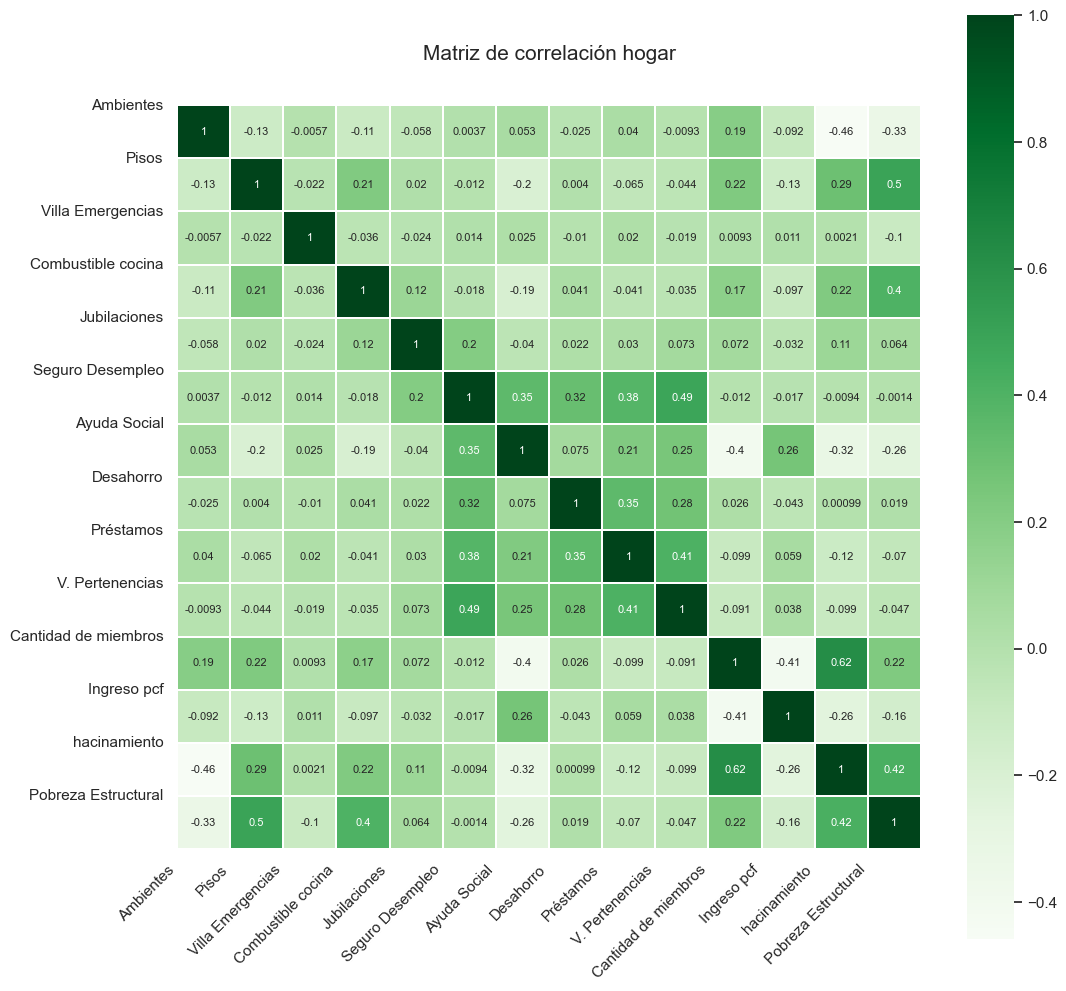

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Buscamos correlaciones entre aspectos relevantes del hogar.
variables_hogar = ['IV2','IV3','IV12_3', 'II8', 'V2','V4','V5','V13', 'V14', 'V17', 'IX_TOT', 'IPCF', 'hacinamiento' ,'pobreza_estructural']
data_eph_hogar = data_eph[variables_hogar]



# Creamos la matriz de correlación 
colormap = plt.cm.Greens 
plt.figure(figsize=(12, 12))
plt.title('Matriz de correlación hogar', y=1.05, size=15)


# Ajustamos el tamaño de la fuente de los números en cada recuadro
heatmap = sns.heatmap(data_eph_hogar.astype(float).corr(),
                      linewidths=0.1,
                      vmax=1.0,
                      square=True,
                      cmap=colormap,
                      linecolor='white',
                      annot=True,
                      annot_kws={"size": 8})  # Ajustamos el tamaño de la fuente

# Cambiamos las etiquetas de los ejes x e y
nuevos_nombres = {
    'IV2': 'Ambientes',
    'IV3': 'Pisos',
    'IV12_3': 'Villa Emergencias',
    'II8': 'Combustible cocina',
    'V2': 'Jubilaciones',
    'V4': 'Seguro Desempleo',
    'V5': 'Ayuda Social',
    'V13': 'Desahorro',
    'V14': 'Préstamos',
    'V17': 'V. Pertenencias',
    'IX_TOT': 'Cantidad de miembros',
    'IPCF': 'Ingreso pcf',
    'pobreza_estructural': 'Pobreza Estructural'
}

plt.xticks(range(len(variables_hogar)), [nuevos_nombres.get(var, var) for var in variables_hogar], rotation=45, ha="right")
plt.yticks(range(len(variables_hogar)), [nuevos_nombres.get(var, var) for var in variables_hogar])

# Guardamos el gráfico en formato JPG
plt.savefig('matriz_correlacion_hogar.jpg', dpi=300, bbox_inches='tight')
plt.show()

Luego creamos una matriz de correlación centrada en aspectos individuales. En ellos incluímos: ingreso per cápita familiar, sexo, edad, estado civil, cobertura médica, si sabe leer o escribir, asistencia a establecimiento educativo, nivel educativo, condición de actividad, categoria de inactividad, estrategia. 

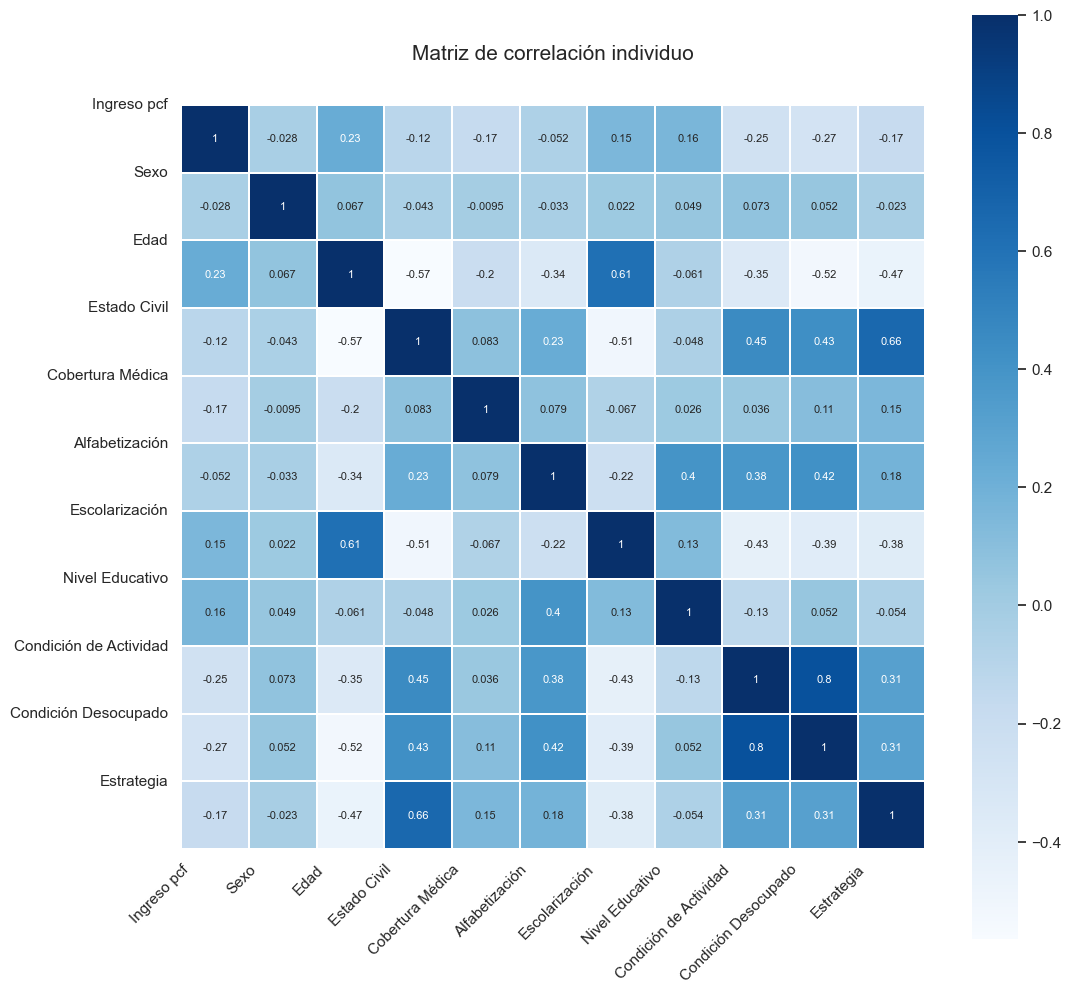

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Variables individuales con nombres
variables_individuales = ['IPCF', 'CH04', 'CH06', 'CH07', 'CH08', 'CH09', 'CH10', 'NIVEL_ED', 'ESTADO', 'CAT_INAC', 'estrategia']
data_eph_indiv = data_eph[variables_individuales]

# Crear la matriz de correlación
colormap = plt.cm.Blues
plt.figure(figsize=(12, 12))
plt.title('Matriz de correlación individuo', y=1.05, size=15)

# Ajustar el tamaño de la fuente de los números en los cuadraditos
heatmap = sns.heatmap(data_eph_indiv.astype(float).corr(),
                      linewidths=0.1,
                      vmax=1.0,
                      square=True,
                      cmap=colormap,
                      linecolor='white',
                      annot=True,
                      annot_kws={"size": 8})  # Ajustar el tamaño de la fuente

# Cambiar las etiquetas de los ejes x e y
nuevos_nombres = {
    'IPCF': 'Ingreso pcf',
    'CH04': 'Sexo',
    'CH06': 'Edad',
    'CH07': 'Estado Civil',
    'CH08': 'Cobertura Médica',
    'CH09': 'Alfabetización',
    'CH10': 'Escolarización',
    'NIVEL_ED': 'Nivel Educativo',
    'ESTADO': 'Condición de Actividad',
    'CAT_INAC': 'Condición Desocupado',
    'estrategia': 'Estrategia'
}

plt.xticks(range(len(variables_individuales)), [nuevos_nombres.get(var, var) for var in variables_individuales], rotation=45, ha="right")

# Ajustar las posiciones de las etiquetas del eje x
plt.setp(heatmap.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

plt.yticks(range(len(variables_individuales)), [nuevos_nombres.get(var, var) for var in variables_individuales])

# Guardar el gráfico en formato JPG
plt.savefig('matriz_correlacion_individuo.jpg', dpi=300, bbox_inches='tight')

plt.show()

### Ejercicio 6
Agregamos a nuestra base los valores de adultos equivalente y cosntruimos la variable pobre

In [35]:
# Nota: modificamos la tabla para que a cada edad desde 0 hasta 99 años se corresponda, según su sexo, con la proporción del adulto equivalente
# Importamos la base de datos con la que trabajaremos la cual se adjunta en GitHub. 
data_equiv = pd.read_excel("tabla_adulto_equiv.xlsx")

In [36]:
# Definimos una función lógica para que dentro de data_eph en caso que la persona sea un hombre (CH04=1) se asigne el valor 
# de la variable Varones dentro de la base de datos de adulto equivalente, haciendo coincidir la edad en data_eph con la de
# la variable Edad dentro de la base de datos de adulto equivalente. Realizamos el mismo procedimiento para las mujeres
data_eph['adulto_equiv'] = None
def assign_data_equiv(row):
    if row['CH04'] == 1:
        return data_equiv.loc[data_equiv['Edad'] == row['CH06'], 'Varones'].values[0]
    elif row['CH04'] == 2:
        return data_equiv.loc[data_equiv['Edad'] == row['CH06'], 'Mujeres'].values[0]
    else:
        return None

# Luego, realizamos este procedimiento para todas las filas de nuestra base de datos
data_eph['adulto_equiv'] = data_eph.apply(assign_data_equiv, axis=1)

In [37]:
# Imprimimos un resumen de nuestra variable creada para chequear que no tengamos valores raros o missing values
resumen_adulto = data_eph['adulto_equiv'].describe() 
missing_values_in_adulto_equiv = data_eph['adulto_equiv'].isnull().sum()

print("Cantidad de valores faltantes en la columna 'adulto_equiv':", missing_values_in_adulto_equiv)
print(resumen_adulto)           

Cantidad de valores faltantes en la columna 'adulto_equiv': 0
count    5491.000000
mean        0.794021
std         0.152647
min         0.370000
25%         0.690000
50%         0.760000
75%         1.000000
max         1.040000
Name: adulto_equiv, dtype: float64


In [38]:
# Por último, creamos la nueva variable adulto_equiv_hog que le asigna la suma de adultos equivalentes en el hogar a cada observación
data_eph['ad_equiv_hogar'] = data_eph.groupby('CODUSU')['adulto_equiv'].transform('sum')

In [39]:
# Contamos la cantidad de veces que la variable Ingreso Total Familiar (ITF) es igual a 0
count_IFT0 = (data_eph['ITF'] == 0).sum()

print(f"La cantidad de personas que no respondieron cuál es su ingreso total familiar es igual a {count_IFT0}")

La cantidad de personas que no respondieron cuál es su ingreso total familiar es igual a 1710


In [40]:
# Creamos un DataFrame llamado "respondieron" con las observaciones donde la variable Ingreso total familiar es mayor que 0
respondieron = data_eph[data_eph['ITF'] > 0]

# Creamos un DataFrame llamado "no_respondieron" con las observaciones donde la variable Ingreso total familiar  es igual a 0
no_respondieron = data_eph[data_eph['ITF'] == 0]

In [41]:
# Agregamos la variable "ingreso_necesario" al DataFrame "respondieron" según el criterio específicado en la consigna
respondieron['ingreso_necesario'] = respondieron['ad_equiv_hogar'] * 57371.05
#respondieron.loc[:, 'ingreso_necesario'] = respondieron['ad_equiv_hogar'] * 57371.05

C:\Users\Usuario\AppData\Local\Temp\ipykernel_3340\42213383.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  respondieron['ingreso_necesario'] = respondieron['ad_equiv_hogar'] * 57371.05


In [42]:
# Ahora agregamos la variable pobre, según si cumple la condición de que el ingreso familiar total para cada individuo es menor 
# al necesario para cubrir la canasta básica total (CBT)
respondieron.loc[:,'pobre'] = (respondieron['ITF'] <= respondieron['ingreso_necesario']).astype(int)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_3340\2159865694.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  respondieron.loc[:,'pobre'] = (respondieron['ITF'] <= respondieron['ingreso_necesario']).astype(int)


In [43]:
# Finalmente, contamos la cantidad de individuos que pueden ser considerados pobres
cantidad_de_pobres = respondieron['pobre'].sum()
total_observaciones = len(respondieron)
porcentaje_pobres = (cantidad_de_pobres / total_observaciones) * 100
print(f"La cantidad de pobres en la muestra es de {cantidad_de_pobres}")
print(f"El porcentaje de pobres de la muestra es de {porcentaje_pobres:.2f}%")

La cantidad de pobres en la muestra es de 1556
El porcentaje de pobres de la muestra es de 41.15%


### Ejercicio 7
En este ejercicio utilizaremos el ponderador PONDIH para estimar la cantidad de hogares pobres en el Gran Buenos Aires

In [44]:
# Agrupamos los datos por el código del hogar (CODUSU)
data_eph_agrupada = respondieron.groupby('CODUSU').first().reset_index()

Creamos la variable "ponde_pobre" que se forma como la multiplicación del estado de ese hogar por la cantidad que pondera (PONDIH), de manera tal, que si sumamos este ponderador nos daría la cantidad de pobres. Para obtener la proporción, lo dividimos por la sumatoria de PONDIH. 


In [45]:
data_eph_agrupada['ponde_pobre'] = data_eph_agrupada['PONDIH'] * data_eph_agrupada['pobre']
cantidad_de_pobres = data_eph_agrupada['ponde_pobre'].sum()
total_poblacion = data_eph_agrupada['PONDIH'].sum()
porcentaje_pobres = (cantidad_de_pobres / total_poblacion) * 100
cantidad_de_pobres_formateada = '{:,}'.format(cantidad_de_pobres).replace(',', '.')
print(f"La cantidad de pobres en la muestra es de {cantidad_de_pobres_formateada}")
print(f"El porcentaje de pobres de la muestra es de {porcentaje_pobres:.2f}%")

La cantidad de pobres en la muestra es de 1.500.527
El porcentaje de pobres de la muestra es de 30.40%


En este caso, el informe del INDEC indica que los hogares en situación de pobreza para Buenos Aires y el Gran Buenos Aires es igual al 30,3. Este valor es similar al calculado por nosotros. 

Guardamos para trabjar después una copia de la base repsondieron y no repsondieron.

In [46]:
respondieron_copia = respondieron.copy()
no_respondieron_copia = no_respondieron.copy()

# Parte II Construcción de funciones

In [47]:
# Importamos las librerias necesarias:
import pandas as pd
import numpy as np
import statsmodels.api as sm     
import seaborn as sns

from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score 
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import RocCurveDisplay
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier

# 1\)
Creamos una función que tome como input al modelo y a las muestras de entrenamiento y test. Dentro de la función indicamos que se ajuste el modelo a partir de la muestra de entrenamiento y luego genere las predicciones en la muestra de test. A partir de este procedimiento calculamos las métricas. Basicamente, esta función evalua qué tan bueno es el modelo dado para predecir un outcome de interés. Debido a que hay modelos continuos, como el DecisionTreeRegressor, específicamos que no se calculen las metras de clasificación para estos casos. 

In [48]:
def evalua_metodo(modelo, x_train, y_train, x_test, y_test):
    '''
    La función realiza una evaluación de los modelos ajustados y devuelve métricas específicas.
    Input:
        modelo, x_train, x_test, y_train, y_test
    Output:
        métricas específicas según el tipo de modelo
    '''
    tn, fp, fn, tp, auc, accuracy, ecm, precision = [None] * 8  # Iniciamos las variables con None
    
    modelo.fit(x_train, y_train)  # Entrenamos el modelo en las muestras de entrenamiento
    y_pred = modelo.predict(x_test)  # Generamos las predicciones a partir de nuestras variables explicativas
    

    matriz_confusion = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = matriz_confusion.ravel()
    precision = precision_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)

    ecm = mean_squared_error(y_test, y_pred)
    resultados = [tn, fp, fn, tp, auc, accuracy, ecm, precision]

    return tn, fp, fn, tp, auc, accuracy, ecm, precision, resultados

# 2\)
Esta función tiene como inputs el modelo, la cantidad de particiones que querramos realizar para cross validation y las muestras de interes (variable explicada y explicativas). En primer lugar le indicamos que realice una partición aleatoria y que para hacerlo no tome las observaciones contiguas. Luego iniciamos un loop para cada forma de particionar la muestra (si tenemos un k=5 este loop itera 5 veces, una vez por distinto tipo de partición) donde indicamos que parte de las particiones se utilizaran como prueba y parte como test. En el siguiente paso utilizamos la función del ejercicio 1, indicando como output las pruebas de test y de entrenamiento que creamos previamente y nos quedamos con el error cuadrático medio calculado a partir de la función. Guardamos en un data frame la información del error cuadrático medio para cada modelo y para cada partición. Finalmente, calculamos el error cuadrático medio del modelo y calibramos para que este sea nuestro outcome, junto con el data frame previamente creado.

In [49]:
def cross_validation(modelo, k, x, y):
    '''
    La función realiza cross-validation con k iteraciones de los modelos.
    Input:
        modelo, k, x, y
    Output:
        métricas de evaluación para cada partición.
    '''
    kf = KFold(n_splits=k, shuffle=True, random_state=10) # Determinamos la forma en que se particiona la muestra
    metrics_list = pd.DataFrame(columns=["modelo", "particion", "ecm"]) # Creamos nuestra data frame
    
    for i, (train_index, test_index) in enumerate(kf.split(x)): # Iteramos a través de cada partición de la muestra
        x_train, x_test = x.iloc[train_index].values, x.iloc[test_index].values # Indicamos la partición de las variables explicativas que estarán en el entrenamiento y test
        y_train, y_test = y.iloc[train_index].values, y.iloc[test_index].values # Indicamos la partición de la variable explicada que estarán en el entrenamiento y test
        
        resultados = evalua_metodo(modelo, x_train, y_train, x_test, y_test) # Utilizamos la función previamente creada para la partición dentro de la iteración.
        ecm = resultados[6] # Nos quedamos con el ecm para esa partición
        metrics_list = pd.concat([metrics_list, pd.DataFrame({"modelo": [str(modelo)], "particion": [i], "ecm": [ecm]})], ignore_index=True) # Creamos el data frame con nuestra información
    
    final_ecm = metrics_list["ecm"].mean() # Calculamos el error cuadrático medio para el modelo que analizamos
    
    return final_ecm, metrics_list

# 3\) 
Esta función tendrá el objetivo de elegir parámetros óptimos para los distintos modelos utilizados en el curso. Tiene como inputs una lista con valores para el hiperparámetro que queremos analizar, junto con la cantidad de particiones que busquemos hacer para la cross validation y las variables explicativas y explicada. En primer lugar, debido a que los métodos de regularización son sensibles a la escala de las variables, estándarizamos nuestras variables explicativas.

Luego, tendremos distintas opciones según el parámetro que intentemos optimizar:

1\) *Lambda para Lasso, Ridge y Elastic Net* en caso que nuestro modelo sea logistic regression iniciamos un loop sobre cada posible valor que tome el lambda y realizamos tres procesos distintos con estos valores: uno para Ridge, uno para Lasso y otro para Elastic Net. En ambos utilizamos nuestra función de cross validation tomando como inputs el modelo de regresión logística a partir de las tres posibles configuraciones. Lo que obtenemos es el promedio del error cuadrático medio para cada uno de los valores de lambda. Además, agregamos una columna a nuestra base de datos de la función cross validation para identificar a que lambda pertenece. Nos quedamos con el mínimo error cuadrático medio promedio para cada especificación y con el menor error cuadrático medio promedio para todas las específicaciones, el cuál será el óptimo. En caso que este sea nuestro modelo, el output será: modelo_óptimo, hiperparametro_optimo, min(min_lasso or float('inf'), min_ridge or float('inf'), min_elasticnet or float('inf')),ret_ridge, ret_lasso, ret_elasticnet y todos los demás outputs vacíos.

2\) *K para el modelo de vecinos más cercanos*: iteramos por cada uno de los valores de k utilizando nuestra función de cross validation, seleccionamos el parámetro que nos da un menor error cuadrático medio promedio y también guardamos una base de datos con el error cuadrático medio para cada partición de cada parámetro. En caso que este sea el modelo que es input de la función los outputs serán: modelo_optimo, hiperparámetro_óptimo, ret_knn. Todos los demás estarán vacíos. 

3\) *Profundidad del árbol en CART*:  iteramos por cada uno de los valores de profundidad utilizando nuestra función de cross validation, seleccionamos el parámetro que nos da un menor error cuadrático medio promedio y también guardamos una base de datos con el error cuadrático medio para cada partición de cada parámetro. En caso que este sea el modelo que es input de la función los outputs serán: modelo_optimo, hiperparámetro_óptimo, ret_cart. Todos los demás estarán vacíos.

In [50]:
def evalua_config(hiperparametro, modelo, k, x, y):
    '''
    Esta función evalúa distintas opciones de parámetros  para distintos modelos usando cross validation y 
    devuelve aquella especificación que minimiza el error cuadrático medio promedio
    Input:
       hiperparametro, modelo, k, x, y
    Output:
        modelo_optimo, hiperparametro_optimo, min_lasso, min_ridge, min_elasticnet, 
        resultados_finales,  ret_ridge, ret_lasso, ret_elasticnet, ret_knn, ret_cart
    '''
    #Creamos diferentes objetos donde guardaremos la información posteriormente. Indicamos, en algunos casos, que esos 
    # objetos estén vacíos para no generar errores en nuestra función.
    ret_lasso = {}
    ret_ridge = {}
    ret_elasticnet = {}
    ret_knn = {}
    ret_cart = {}
    
   

    resultados_lasso = pd.DataFrame()
    resultados_ridge = pd.DataFrame()
    resultados_elasticnet = pd.DataFrame()
    resultados_knn = pd.DataFrame()
    resultados_cart = pd.DataFrame()
    

    min_lasso = None
    min_ridge = None
    min_elasticnet = None
   
    hip_lasso = None
    hip_ridge = None
    hip_elasticnet = None

    #Estándarizamos la muestra de variables explicativas, ya que ciertas funciones la utilizan de esta manera.
    sc = StandardScaler()
    x_transformed = pd.DataFrame(sc.fit_transform(x), index=x.index, columns=x.columns)

    if modelo == "LogisticRegression": #Indicamos que se realice esta parte del código siempre que el modelo sea logistic
        for elem in hiperparametro:
            # Lasso
            clf_lasso_LR = LogisticRegression(C=1/elem, penalty="l1", solver="saga", tol=0.01, random_state=10)
            ecm_lasso, result_lasso = cross_validation(clf_lasso_LR, k, x_transformed, y) #Guardamos los dos outputs de la función cross validation
            ret_lasso[elem] = ecm_lasso #guardamos el error cuadrático promedio en una lista, para cada parámetro
            result_lasso['Lambda'] = elem #agregamos a nuestra base de cross validation una columna que indique a qué parámetro pertenece
            resultados_lasso = pd.concat([resultados_lasso, result_lasso], ignore_index=True) #Concatenamos las bases

            # Ridge (igual procedimiento que lasso) 
            clf_ridge_LR = LogisticRegression(C=1/elem, penalty="l2", solver="saga", tol=0.01, random_state=10)
            ecm_ridge, result_ridge = cross_validation(clf_ridge_LR, k, x_transformed, y)
            ret_ridge[elem] = ecm_ridge
            result_ridge['Lambda'] = elem
            resultados_ridge = pd.concat([resultados_ridge, result_ridge], ignore_index=True)

            # Elastic Net (igual procedimiento que lasso y ridge)
            clf_elasticnet_LR = LogisticRegression(C=1/elem, penalty="elasticnet", solver="saga", l1_ratio=0.5, tol=0.01, random_state=10)
            ecm_elasticnet, result_elasticnet = cross_validation(clf_elasticnet_LR, k, x_transformed, y)
            ret_elasticnet[elem] = ecm_elasticnet
            result_elasticnet['Lambda'] = elem
            resultados_elasticnet = pd.concat([resultados_elasticnet, result_elasticnet], ignore_index=True)
        
        #Calculamos el mínimo error cuadrático promedio para cada especificación
        min_lasso = min(ret_lasso.values(), default=None)
        min_ridge = min(ret_ridge.values(), default=None)
        min_elasticnet = min(ret_elasticnet.values(), default=None)
        #Guardamos la etiqueta de aquél parámetro que tiene el menor error cuadrático promedio
        hip_lasso = min(ret_lasso, key=ret_lasso.get, default=None)
        hip_ridge = min(ret_ridge, key=ret_ridge.get, default=None)
        hip_elasticnet = min(ret_elasticnet, key=ret_elasticnet.get, default=None)
      
    #Indicamos que se realice esta parte del código siempre que el modelo sea k vecinos más cercanos
    elif modelo == "KNN":
        for k_value in hiperparametro:
                modelo_knn = KNeighborsClassifier(n_neighbors=k_value) #Indicamos nuestro modelo con cada parámetro a validar
                ecm_knn, result_knn = cross_validation(modelo_knn, k, x, y) #Guardamos los dos outputs de la función cross validation
                ret_knn[k_value] = ecm_knn #guardamos el error cuadrático promedio en una lista, para cada parámetro
                result_knn['K-Vecinos'] = k_value #agregamos a nuestra base de cross validation una columna que indique a qué parámetro pertenece
                resultados_knn = pd.concat([resultados_knn, result_knn], ignore_index=True) #Concatenamos las bases
        #Calculamos el menor error cuadrático promedio entre los distintos k y guardamos la key que nos lo proveé
        min_knn = min(ret_knn.values(), default=None)
        hip_knn = min(ret_knn, key=ret_knn.get, default=None)

    #Indicamos que se realice esta parte del código siempre que el modelo sea CART    
    elif modelo == "CART":
        for depth_range in hiperparametro:
                tree_model = DecisionTreeClassifier(max_depth=depth_range) #Indicamos nuestro modelo con cada parámetro a validar
                ecm_tree, result_tree = cross_validation(tree_model, k, x, y) #Guardamos los dos outputs de la función cross validation
                ret_cart[depth_range] = ecm_tree #guardamos el error cuadrático promedio en una lista, para cada parámetro
                result_tree['Profundidad'] = depth_range #agregamos a nuestra base de cross validation una columna que indique a qué parámetro pertenece
                resultados_cart = pd.concat([result_tree, result_tree], ignore_index=True)#Concatenamos las bases
        #Calculamos el menor error cuadrático promedio entre los distintos k y guardamos la key que nos lo proveé
        min_cart = min(ret_cart.values(), default=None)
        hip_cart = min(ret_cart, key=ret_cart.get, default=None)
        
        
    tipo_modelo = ""
    hiperparametro_optimo = None
    
    #En este paso, en caso que hayamos utilizado el modelo logistic regression, nos quedamos con el óptimo de los tres métodos de regularización
    if min_lasso is not None and (min_ridge is None or min_lasso < min_ridge) and (min_elasticnet is None or min_lasso < min_elasticnet):
        tipo_modelo = "Lasso"
        hiperparametro_optimo = hip_lasso
    elif min_ridge is not None and (min_lasso is None or min_ridge < min_lasso) and (min_elasticnet is None or min_ridge < min_elasticnet):
        tipo_modelo = "Ridge"
        hiperparametro_optimo = hip_ridge
    elif min_elasticnet is not None and (min_lasso is None or min_elasticnet < min_lasso) and (min_ridge is None or min_elasticnet < min_ridge):
        tipo_modelo = "ElasticNet"
        hiperparametro_optimo = hip_elasticnet
    
    #Si el modelo es k vecinos más cercanos, determinamos el hiperparámetro óptimo según este modelo
    if ret_knn:
        tipo_modelo = "KNN"
        hiperparametro_optimo = hip_knn
    #Si el modelo es cart, determinamos el hiperparámetro óptimo según este modelo 
    elif ret_cart:
        tipo_modelo = "CART"
        hiperparametro_optimo = hip_cart


    # Concatenamos o las bases de datos para las distintas específicaciones, esto nos servirá especialmente cuando hacemos logistic regression para comparar
    resultados_finales = pd.concat([resultados_lasso, resultados_ridge, resultados_elasticnet, resultados_knn, resultados_cart], axis=1)

    # Determinamos los distintos outputs
    return tipo_modelo, hiperparametro_optimo, min(min_lasso or float('inf'), min_ridge or float('inf'), min_elasticnet or float('inf')), min_lasso, min_ridge, min_elasticnet, resultados_finales,  ret_ridge, ret_lasso, ret_elasticnet, ret_knn, ret_cart

# 4)
Esta función tiene como objetivo evaluar de manera simultánea distintos modelos para hacer clasificación, al mismo tiempo, permite optimizar los hiperparámetros de cada uno de estos modelos. Tiene como inputs la cantidad de particiones para realizar cross validation, una lista de vecinos cercanos a utilizar en ese modelo, el valor de lambda para regularizar la regresión logística, el parámetro ligado a Cart, Adaboost, Random Forest y boosting y las variables explicativas y explicada. Para cada modelo, una vez obtenido el hiperparámetro óptimo, nos devuelve las métricas de precisión utilizando ese hiperparámetro. En los modelos de regresión logistíca, k vecinos más cercanos, análisis discriminante y CART utilizamos para encontrar los parámetros óptimos la función evalua método creada previamente. Por el otro lado, para los modelos Adaboost, random forest, bagging y boosting utilizamos la función específica de optimización de estos modelo. 

In [51]:
def evalua_multiples_metodos(k_cv, k_nn, hiperparam, hiper_a, params_grid,params_grid_ab,param_grid_boost, x, y):
    '''
    Esta función evalúa modelos de Regresión Logística, K Vecinos Cercanos, Análisis Discriminante, CART, AdaBoost  
    Input:
        k_cv, k_knn, hiperparam, hiper_a x_train, x_test, y_train, y_test, x, y
    Output:
        dataset con las métricas de precisión de los modelos analizados.
    '''
    
    #Generamos algunos objetos que nos servirán posteriormente
    modelos = ['LogisticRegression', 'KNN', 'analisis_discriminante', 'CART', 'Bagging', 'RandomForest', 'AdaBoost','Boosting']
    matriz = pd.DataFrame(columns=["Modelo", "Hiperparametro", "Profundidad", "Estimadores","Features" ,"n Sample","Learning","Precisión", "AUC", "ECM"])
    #Partimos nuestra muestra entre test y entrenamiento para utilizar una vez que optimizamos el modelo a utilizar
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=10)

    # Estandarizamos las variables para la regresión logística
    sc = StandardScaler()
    x_transformed_train = pd.DataFrame(sc.fit_transform(x_train), index=x_train.index, columns=x_train.columns)
    x_transformed_test = pd.DataFrame(sc.fit_transform(x_test), index=x_test.index, columns=x_test.columns)

    for modelo in modelos:
        if modelo == 'LogisticRegression': #Realizamos el proceso para la regresión logística, nos devolverá el tipo de regularización óptimo
            tipo_modelo, hiperparametro_optimo, _, _, _, _, _, _, _, _, _, _ = evalua_config(hiperparam,modelo, k_cv, x_train, y_train) # Utilizamos la muestra de entrenamiento, dado que luego realiza cross-validation
            #De acuerdo al modelo elegido en el paso anterior, se calculan las métricas a partir de evalua_metodo
            if tipo_modelo == "Lasso":
                log_reg = LogisticRegression(penalty="l1", C=1 / hiperparametro_optimo, solver="saga", max_iter=1000,
                                             random_state=10)
            elif tipo_modelo == "ElasticNet":
                log_reg = LogisticRegression(penalty="elasticnet", C=1 / hiperparametro_optimo, solver="saga",
                                             l1_ratio=0.5, max_iter=1000, random_state=10)
            else:
                log_reg = LogisticRegression(penalty="l2", C=1 / hiperparametro_optimo, solver="saga", max_iter=1000,
                                             random_state=10)
            metricas_log = evalua_metodo(log_reg, x_transformed_train, y_train, x_transformed_test, y_test) #utilizamos la función evalua metodo
            results = [modelo, hiperparametro_optimo,"NA","NA","NA","NA", "NA",metricas_log[7], metricas_log[4], metricas_log[6]] #Nos quedamos con aquellas métricas que nos interesan
            matriz.loc[len(matriz)] = results #Agregamos a nuestra matriz las métricas de esta específicación
        
        #Realizamos el mismo procedimiento para k vecinos más cercanos
        if modelo == 'KNN':
            _, hiperparametro_optimo, _, _, _, _, _, _, _, _, _, _ = evalua_config(k_nn, modelo, k_cv, x_train, y_train) # Utilizamos la muestra de entrenamiento, dado que luego realiza cross-validation
            x_test_a = np.array(x_test)
            x_train_a = np.array(x_train)
            k_vecinos = KNeighborsClassifier(n_neighbors=hiperparametro_optimo)
            metricas_knn = evalua_metodo(k_vecinos, x_train_a, y_train, x_test_a, y_test)
            results = [modelo, hiperparametro_optimo, "NA","NA","NA","NA","NA", metricas_knn[7], metricas_knn[4], metricas_knn[6]]
            matriz.loc[len(matriz)] = results #agregamos las métricas de esta especificación a nuestra matriz
        
        #Debido a que análisis discriminante no tiene hiperparámetro por optimizar, solamente calculamos las métricas       
        if modelo == 'analisis_discriminante':
            an_dis = LinearDiscriminantAnalysis().fit(x_train, y_train)
            metricas_ad = evalua_metodo(an_dis, x_train, y_train, x_test, y_test)
            results = [modelo, "NA","NA","NA","NA","NA","NA", metricas_ad[7], metricas_ad[4], metricas_ad[6]]
            matriz.loc[len(matriz)] = results #agregamos las métricas de esta especificación a nuestra matriz
        
        #Realizamos el mismo procedimiento para Cart
        if modelo == 'CART':
            _, hiperparametro_optimo, _, _, _, _, _, _, _, _, _, _ = evalua_config(hiper_a, modelo, k_cv, x_train, y_train) # Utilizamos la muestra de entrenamiento, dado que luego realiza cross-validation
            tree_model = DecisionTreeClassifier(max_depth=hiperparametro_optimo)
            metricas_cart = evalua_metodo(tree_model, x_train, y_train, x_test, y_test)
            results = [modelo, "NA",hiperparametro_optimo,"NA","NA","NA","NA", metricas_cart[7], metricas_cart[4], metricas_cart[6]]
            matriz.loc[len(matriz)] = results #agregamos las métricas de esta especificación a nuestra matriz
        
        
        #A partir de esta sección, la función utilizará para encontrar el o los hiperparámetros óptimos será la función específica de cada modelo GridSearchCV
        
        # Hacemos cv para los modelos
        cv = KFold(n_splits=k_cv, shuffle=True, random_state=10) 
        
        
        if modelo == 'AdaBoost':
            adaboost_model =  GridSearchCV(AdaBoostClassifier(base_estimator=DecisionTreeClassifier(random_state=10)), param_grid=params_grid_ab, cv=cv, verbose=1)
            adaboost_model.fit(x_train, y_train)
            adaboost_model_a = adaboost_model.best_estimator_
            profundidad = adaboost_model.best_params_['base_estimator__max_depth']
            learning = adaboost_model.best_params_['learning_rate']
            estimator = adaboost_model.best_params_['n_estimators']
            metricas_adaboost = evalua_metodo(adaboost_model_a, x_train, y_train, x_test, y_test)
            results = [modelo, "NA",profundidad,estimator,"NA","NA",learning, metricas_adaboost[7], metricas_adaboost[4], metricas_adaboost[6]]
            matriz.loc[len(matriz)] = results #agregamos las métricas de esta especificación a nuestra matriz
           
        if modelo == 'RandomForest':
            rf = RandomForestClassifier (random_state=10)
            rf_model =  GridSearchCV(estimator=rf, param_grid=params_grid, cv=cv, verbose=1)
            rf_model.fit(x_train, y_train)
            rf_model_a = rf_model.best_estimator_
            estimador = rf_model.best_params_['n_estimators']
            features = rf_model.best_params_['max_features']
            sample = rf_model.best_params_['max_samples']
            metricas_rf = evalua_metodo(rf_model_a, x_train, y_train, x_test, y_test)
            results = [modelo,"NA","NA", estimador,features, sample,"NA", metricas_rf[7], metricas_rf[4], metricas_rf[6]]
            matriz.loc[len(matriz)] = results #agregamos las métricas de esta especificación a nuestra matriz
            
        if modelo == 'Bagging':
            bagging = BaggingClassifier(random_state=10)
            bagging_model = GridSearchCV(estimator=bagging, param_grid=params_grid, cv=cv, verbose=1)
            bagging_model.fit(x_train, y_train)
            bagging_model_a = bagging_model.best_estimator_
            features = bagging_model.best_params_['max_features']
            n_estimators = bagging_model.best_params_['n_estimators']
            max_samples = bagging_model.best_params_['max_samples']
            metricas_bagging = evalua_metodo(bagging_model_a, x_train, y_train, x_test, y_test)
            results = [modelo, "NA", "NA", n_estimators, features, max_samples,"NA", metricas_bagging[7], metricas_bagging[4], metricas_bagging[6]]
            matriz.loc[len(matriz)] = results  # agregamos las métricas de esta especificación a nuestra matriz

        if modelo == 'Boosting':
            gb = GradientBoostingClassifier(random_state=10)
            gb_model = GridSearchCV(estimator=gb, param_grid=param_grid_boost, cv=cv, verbose=1)
            gb_model.fit(x_train, y_train)
            gb_model_a = gb_model.best_estimator_
            n_estimators = gb_model.best_params_['n_estimators']
            learning = gb_model.best_params_['learning_rate']
            profundidad = gb_model.best_params_['max_depth']
            metricas_boosting = evalua_metodo(gb_model_a, x_train, y_train, x_test, y_test)
            results = [modelo, "NA", profundidad, n_estimators, "NA", "NA",learning, metricas_boosting[7], metricas_boosting[4], metricas_boosting[6]]
            matriz.loc[len(matriz)] = results  # agregamos las métricas de esta especificación a nuestra matriz

    #El resultado será un dataset con todas los modelos optimizados junto a sus metricas de precisión
    return matriz

# Parte III Clasificación y regularización

Eliminamos las variables relacioandas al ingreso, establecemos la variable pobre como dependiente y el resto como variables independientes. 

In [52]:
# Generamos el vector de variables a eliminar
# Eliminamos el identificador, ponderador, variables de ingreso, adulto_equiv y ad_equiv_hogar.
# Las otras variables fueron eliminadas según lo explicado en la Parte I ejercicio 5.
columnas_a_eliminar = ['CODUSU','ITF','PONDIH', 'IPCF','P47T','adulto_equiv','ad_equiv_hogar']
respondieron = respondieron.drop (columns=columnas_a_eliminar)
respondieron = respondieron.drop(columns=['ingreso_necesario'])
no_respondieron = no_respondieron.drop (columns=columnas_a_eliminar)
# Definimos a la variable pobre como nuestra variable dependiente
y = respondieron['pobre']
# Definimos las variables independientes (X) excluyendo 'pobre'
x = respondieron.drop(columns=['pobre'])
# Agregamos la columna de la constante
x = pd.concat([pd.Series(1, index=x.index, name='constante'), x], axis=1)

In [ ]:
# Definimos los parámetros para cada uno de los modelos de acuerdo a sus especificaciones.

params_grid = {
    'bootstrap': [True],
    'max_samples': [0.25, 0.5, 0.75],
    'max_features': [3, 6, 9,12,15],
    'n_estimators': [25, 50, 75, 100]
}

params_grid_boost = {
    'max_depth': [3, 4, 5, 6],
    "learning_rate":[0.01, 0.05,0.1,0.3,1],
    'n_estimators': [25, 50, 75, 100]
}

params_grid_adab = {
    "n_estimators": [25, 50, 75,100],
    "learning_rate":[0.01, 0.05,0.1,0.3,1],
    "base_estimator__max_depth": [1, 2, 3,5,6]}

k_cv_values = 10
hiperparametro_knn = list(range(2, 10))
hiperparam = 10**np.linspace(-5, 5, 11)
hiper_a_value = list(range(2, 20))

#Utilizamos nuestra función para calcular las métricas y luego determinar qué modelo utilizaremos. 
resultado = evalua_multiples_metodos(k_cv_values, hiperparametro_knn, hiperparam, hiper_a_value, params_grid, params_grid_adab, params_grid_boost, x, y)

In [ ]:
# Imprimimos la tabla con los resultados de los diferentes modelos
print("",resultado)


Elegimos el modelo AdaBoost con una profundidad de 6 y 100 n_estimator y 0.1 en learning. A continuación, detallamos algunos pros y contras de esta especificación que deben ser tenidos en cuenta:

# Pros
La elección de una profundidad de 6 permite a los árboles de decisión base capturar patrones más complejos en los datos de entrenamiento. Al utilizar 100 estimadores, AdaBoost crea un ensemble robusto al combinar múltiples clasificadores base, lo que puede mejorar la capacidad de generalización del modelo. Una tasa de aprendizaje de 0.1 ayuda a controlar la contribución de cada clasificador base al conjunto, facilitando una adaptación más gradual y potencialmente mejorando la generalización.

# Contras:
La profundidad de 6 puede aumentar el riesgo de sobreajuste, especialmente si el conjunto de datos de entrenamiento no es lo suficientemente grande o diverso (creemos que en este caso la diversidad y las observaciones pueden sostener este tipo de modelo.Entrenar y utilizar 100 estimadores puede aumentar la complejidad computacional, especialmente en conjuntos de datos grandes (en este caso, a pesar que correr el código lleva un tiempo prudencial no fue un gran problema hacerlo). A medida que la complejidad del modelo aumenta, la interpretación de los resultados puede volverse más desafiante. Un conjunto de 100 árboles de decisión puede ser difícil de visualizar y entender.

In [ ]:
# Generamos la variale de entrenamiento y test 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=10)

# Definimos y ajustamos el modelo, según los hiperparámetros optimizados
modelo = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=6,random_state=10),n_estimators=100,learning_rate = 0.1, random_state=10)
modelo.fit(x_train, y_train)

Predecimos fuera de la muestra

In [ ]:
# Definimos xp a la base no respondieron y le agregamos la columna de constante
xp = no_respondieron
xp = pd.concat([pd.Series(1, index=xp.index, name='constante'), xp], axis=1)

# Generamos las predicciones
Y_norespondieron_pred = modelo.predict(xp)

In [ ]:
# Calculamos la proporción de personas "pobres" y "no pobres" en el conjunto de prueba
proporcion_pobres = (Y_norespondieron_pred == 1).mean()
proporcion_no_pobres = (Y_norespondieron_pred == 0).mean()

print("Proporción de personas consideradas 'pobres':", proporcion_pobres)
print("Proporción de personas consideradas 'no pobres':", proporcion_no_pobres)

In [ ]:
#Agregar columna de pobre en base a la predicción
no_respondieron['Pobre'] = Y_norespondieron_pred

In [ ]:
# Dejamos la base de datos de copia igual que la de no respondieron y respondieron original
# a excepción de las variables CODUSU y PONDIH
columnas_a_eliminar = ['ITF','IPCF', 'P47T','adulto_equiv','ad_equiv_hogar']
respondieron_copia = respondieron_copia.drop (columns=columnas_a_eliminar)
respondieron_copia = respondieron_copia.drop(columns=['ingreso_necesario'])
no_respondieron_copia = no_respondieron_copia.drop (columns=columnas_a_eliminar)

In [ ]:
# Agregamos a no_respondieron_copia la variable Pobre generada en no_respondieron
no_respondieron_copia['Pobre'] = no_respondieron['Pobre']
# Agrupamos los datos por el código del hogar (CODUSU)
no_respondieron_copia = no_respondieron_copia.groupby('CODUSU').first().reset_index()

In [ ]:
# Calculamos la proporción de hogares "pobres" y "no pobres"
proporcion_pobres_hogares = (no_respondieron_copia['Pobre'] == 1).mean()
proporcion_no_pobres_hogares = (no_respondieron_copia['Pobre'] == 0).mean()

print("Proporción de hogares consideradas 'pobres':", proporcion_pobres_hogares)
print("Proporción de hogares consideradas 'no pobres':", proporcion_no_pobres_hogares)

En este caso, añadiendo las variables creadas por nosotros mismos y también utilizando un modelo distinto al utilizado en el trabajo práctico anterior se predice una tasa de pobreza mayor y a una distancia similar a la que habían quedado las predicciones del trabajo práctico pasado respecto a la tasa real publicada por el INDEC